In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [4]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [5]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [6]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


In [8]:
# To select all columns except the last one for X1, and the last column for y1:
X = df.iloc[:, :-1]  # Select all columns except the last one for features (X1)
y = df.iloc[:, -1]   # Select the last column as the target (y1)

In [9]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,SSA,PS,PV,Potential,NC,Id/Ig
182,0.477,1.96,0.230,1.0,0.00,1.01
89,0.000,0.00,0.000,0.8,0.00,1.12
185,2.086,2.10,1.100,1.0,0.00,0.00
148,1.578,0.00,1.092,1.2,0.68,0.00
204,0.521,0.00,0.380,1.0,7.30,1.00
...,...,...,...,...,...,...
71,3.110,0.70,1.680,1.0,0.00,0.00
106,0.787,5.81,1.140,1.0,0.00,0.00
270,1.588,0.00,1.010,0.9,5.30,0.84
435,1.417,2.22,1.560,1.0,1.99,1.01


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# Train Decision Tree Regressor
# -----------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score value: {r2:.3f}")
print(f"MAE value: {mae:.3f}")
print(f"RMSE value: {rmse:.3f}")




R² Score value: 0.151
MAE value: 67.433
RMSE value: 95.500


In [13]:
dt_model2= DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=2, random_state=42)
dt_model2.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_pred = dt_model2.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score value2: {r2:.3f}")
print(f"MAE value2: {mae:.3f}")
print(f"RMSE value2: {rmse:.3f}")


R² Score value2: 0.440
MAE value2: 58.776
RMSE value2: 77.608


Fitting 10 folds for each of 810 candidates, totalling 8100 fits
Best Parameters from Grid Search: {'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}

Model Performance on Test Data:
R² Score Grid Search C: 0.350
MAE Grid Search C: 58.622
RMSE Grid Search C: 83.566


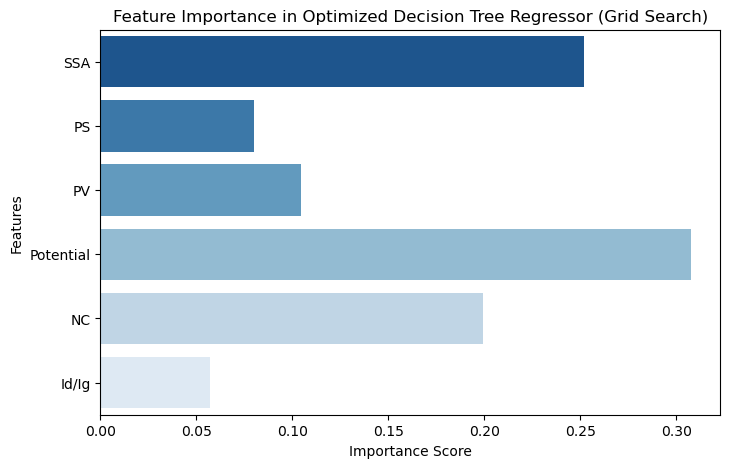

In [14]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
# -----------------------------
# Define parameter grid for Grid Search
# -----------------------------
param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

# -----------------------------
# Decision Tree Regressor + Grid Search CV
# -----------------------------
dt = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=10,                  # 10-fold cross-validation
    scoring="r2",           # optimize for R²
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# -----------------------------
# Best Parameters & Model
# -----------------------------
print("Best Parameters from Grid Search:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

# -----------------------------
# Predictions with best model
# -----------------------------
y_pred = best_dt.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance on Test Data:")
print(f"R² Score Grid Search C: {r2:.3f}")
print(f"MAE Grid Search C: {mae:.3f}")
print(f"RMSE Grid Search C: {rmse:.3f}")

# -----------------------------
# Feature Importance Visualization
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=best_dt.feature_importances_, y=X.columns, palette="Blues_r")
plt.title("Feature Importance in Optimized Decision Tree Regressor (Grid Search)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [16]:
# Random Forest Regression with RandomizedSearchCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# Define parameter distributions for Random Search
# -----------------------------
param_dist = {
    "splitter": ["best", "random"],
    "max_depth": [None, 5, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 10],
    "max_features": [None, "sqrt", "log2"]
}

# -----------------------------
# Decision Tree Regressor + Random Search CV
# -----------------------------
dt2 = DecisionTreeRegressor(criterion="squared_error", random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt2,
    param_distributions=param_dist,
    n_iter=50,              # number of random parameter settings to try
    cv=10,                  # 10-fold cross-validation
    scoring="r2",           # optimize for R²
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit model
random_search.fit(X_train, y_train)

# -----------------------------
# Best Parameters & Model
# -----------------------------
print("Best Parameters from Random Search:", random_search.best_params_)

best_dt = random_search.best_estimator_

# -----------------------------
# Predictions with best model
# -----------------------------
y_pred = best_dt.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance on Test Data:")
print(f"R² Score Random Search CV: {r2:.3f}")
print(f"MAE Random Search CV: {mae:.3f}")
print(f"RMSE Random Search CV: {rmse:.3f}")




Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters from Random Search: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}

Model Performance on Test Data:
R² Score Random Search CV: 0.501
MAE Random Search CV: 57.204
RMSE Random Search CV: 73.234
